In [2]:
import pandas as pd

data = pd.read_csv(r"C:\Users\abdul\Downloads\archive (4)\student-por.csv")

In [3]:
print(data.head())

print(data.isnull().sum())

print(data.info())

  school sex  age address famsize Pstatus  Medu  Fedu     Mjob      Fjob  ...  \
0     GP   F   18       U     GT3       A     4     4  at_home   teacher  ...   
1     GP   F   17       U     GT3       T     1     1  at_home     other  ...   
2     GP   F   15       U     LE3       T     1     1  at_home     other  ...   
3     GP   F   15       U     GT3       T     4     2   health  services  ...   
4     GP   F   16       U     GT3       T     3     3    other     other  ...   

  famrel freetime  goout  Dalc  Walc health absences  G1  G2  G3  
0      4        3      4     1     1      3        4   0  11  11  
1      5        3      3     1     1      3        2   9  11  11  
2      4        3      2     2     3      3        6  12  13  12  
3      3        2      2     1     1      5        0  14  14  14  
4      4        3      2     1     2      5        0  11  13  13  

[5 rows x 33 columns]
school        0
sex           0
age           0
address       0
famsize       0
Pstatus 

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
features = ['studytime', 'failures', 'absences', 'famsup', 'internet', 'health', 'freetime', 'Medu', 'Fedu']
X = data[features].copy()  # Use .copy() to avoid SettingWithCopyWarning
y = data['G3']  # Target variable

# Convert categorical variables into numeric where necessary
X['famsup'] = data['famsup'].map({'yes': 1, 'no': 0})  # Convert 'famsup' to numeric
X['internet'] = data['internet'].map({'yes': 1, 'no': 0})  # Convert 'internet' to numeric

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [7]:
model = LinearRegression()

# Fit the model
model.fit(X_train, y_train)

# Coefficients and intercept
print("Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

Coefficients: [ 0.66739416 -1.76405112 -0.03144409  0.04675919  0.57148183 -0.17375295
 -0.18830181  0.29422137  0.2357773 ]
Intercept: 10.525268105724978


In [8]:
# Making predictions
y_pred = model.predict(X_test)

# Evaluating the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("R-squared (R²):", r2)

Mean Squared Error (MSE): 7.764979082568752
R-squared (R²): 0.20373203019701025


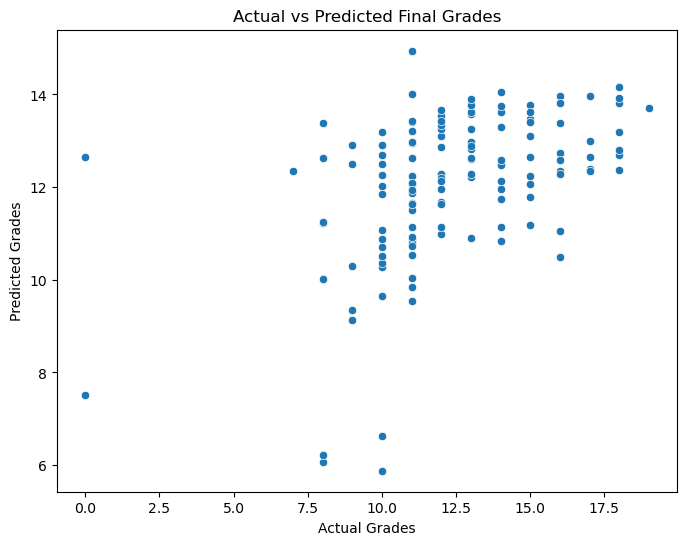

In [9]:
# Scatter plot of actual vs. predicted
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Grades")
plt.ylabel("Predicted Grades")
plt.title("Actual vs Predicted Final Grades")
plt.show()

In [10]:
results = pd.DataFrame({
    'Actual': y_test,
    'Predicted': y_pred,
    'Absolute_Error': abs(y_test - y_pred)
})

# Sort by Absolute_Error in descending order
top_5_errors = results.sort_values(by='Absolute_Error', ascending=False).head(5)

print(top_5_errors)

     Actual  Predicted  Absolute_Error
603       0  12.646308       12.646308
163       0   7.506123        7.506123
617      18  12.369014        5.630986
212      16  10.499415        5.500585
522       8  13.386351        5.386351
